In [1]:
from keras.datasets import imdb
import numpy as np

In [2]:
((XT,YT),(Xt,Yt))=imdb.load_data(num_words=10000)

In [3]:
word_idx=imdb.get_word_index()

In [4]:
idx_word=dict([value,key] for (key,value) in word_idx.items())

In [5]:
actual_review=' '.join([idx_word.get(idx-3,'?') for idx in XT[0]])

In [6]:
#VECTORIZATION

In [7]:
def vectorize(sentences,dim=10000):
    outputs=np.zeros((len(sentences),dim)) 
    
    for i,idx in enumerate(sentences):
        outputs[i,idx]=1
    return outputs

In [29]:
import pickle
pickle.dump(vectorize, open('convert_to_vector.pkl', 'wb'))

In [8]:
X_train=vectorize(XT)
X_test=vectorize(Xt)

MODEL ARCHITECTURE

In [9]:
# USE RELU Activation
# 2 hidden layers 16 units
# 1 output layer with 1 unit (Sigmoid Activation)

In [10]:
from keras import models
from keras.layers import Dense

In [11]:
model=models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


TRAINING MODEL

In [13]:
#we will use early stopping method to avoid overfitting

In [14]:
x_val=X_train[:5000]
x_train_new=X_train[5000:]

y_val=YT[:5000]
y_train_new=YT[5000:]

In [15]:
hist=model.fit(x_train_new,y_train_new,epochs=4,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/4
40/40 [==============================] - 1s 19ms/step - loss: 0.5010 - accuracy: 0.7965 - val_loss: 0.3699 - val_accuracy: 0.8676
Epoch 2/4
40/40 [==============================] - 0s 11ms/step - loss: 0.3003 - accuracy: 0.8990 - val_loss: 0.3165 - val_accuracy: 0.8690
Epoch 3/4
40/40 [==============================] - 0s 11ms/step - loss: 0.2284 - accuracy: 0.9209 - val_loss: 0.2718 - val_accuracy: 0.8924
Epoch 4/4
40/40 [==============================] - 0s 11ms/step - loss: 0.1852 - accuracy: 0.9344 - val_loss: 0.2875 - val_accuracy: 0.8864


In [16]:
with open("model.json",'w') as file:
    file.write(model.to_json())
model.save_weights('model.h5')

In [17]:
import matplotlib.pyplot as plt

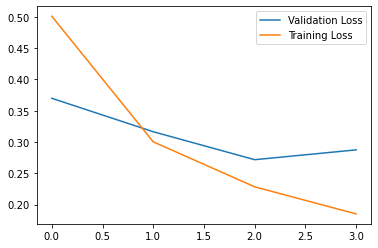

In [18]:
plt.plot(hist.history['val_loss'],label="Validation Loss")
plt.plot(hist.history['loss'],label="Training Loss")
plt.legend()
plt.show()

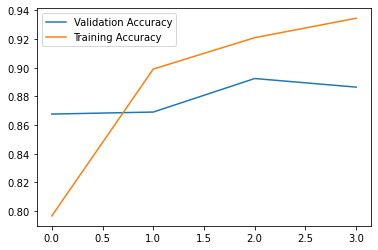

In [19]:
plt.plot(hist.history['val_accuracy'],label="Validation Accuracy")
plt.plot(hist.history['accuracy'],label="Training Accuracy")
plt.legend()
plt.show()

In [20]:
#Validation accuracy decreases after 4 epochs

In [21]:
model.evaluate(X_test,Yt)

782/782 [==============================] - 2s 2ms/step - loss: 0.3083 - accuracy: 0.8748


[0.30825871229171753, 0.8748400211334229]

In [22]:
#on the test set we are getting 88.17% Accuracy

In [23]:
model.evaluate(x_train_new,y_train_new)

625/625 [==============================] - 1s 2ms/step - loss: 0.1631 - accuracy: 0.9458


[0.16312243044376373, 0.9458000063896179]

In [24]:
#We get 94% accuracy